<a href="https://colab.research.google.com/github/kliang696/Analysis/blob/main/Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/content/drive/MyDrive/league/final_data.csv")

In [4]:
df=df.drop(["championId","teamId","allInPings","needVisionPings","sightWardsBoughtInGame","unrealKills","teamEarlySurrendered","totalHealsOnTeammates","riotIdTagline","riotIdName","summonerLevel","summoner1Casts","summoner1Id","summoner2Casts","summoner2Id","pushPings","assistMePings","baitPings","basicPings","totalTimeSpentDead","championTransform","commandPings","dangerPings","eligibleForProgression","enemyMissingPings","enemyVisionPings","getBackPings","holdPings","onMyWayPings","profileIcon","nexusLost","gameEndedInSurrender","nexusTakedowns","bountyLevel","nexusKills","participantId","challenges","lane","perks","puuid","role","summonerId","summonerName","teamPosition","longestTimeSpentLiving","goldSpent","spell1Casts","spell2Casts","spell3Casts","spell4Casts","item0","item1","item2","item3","item4","item5","item6"],axis=1)

In [5]:
df[df.duplicated()]

,assists,baronKills,champExperience,champLevel,championName,consumablesPurchased,damageDealtToBuildings,damageDealtToObjectives,damageDealtToTurrets,damageSelfMitigated,...,trueDamageTaken,turretKills,turretTakedowns,turretsLost,visionClearedPings,visionScore,visionWardsBoughtInGame,wardsKilled,wardsPlaced,win


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Data columns (total 64 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   assists                         27000 non-null  int64 
 1   baronKills                      27000 non-null  int64 
 2   champExperience                 27000 non-null  int64 
 3   champLevel                      27000 non-null  int64 
 4   championName                    27000 non-null  object
 5   consumablesPurchased            27000 non-null  int64 
 6   damageDealtToBuildings          27000 non-null  int64 
 7   damageDealtToObjectives         27000 non-null  int64 
 8   damageDealtToTurrets            27000 non-null  int64 
 9   damageSelfMitigated             27000 non-null  int64 
 10  deaths                          27000 non-null  int64 
 11  detectorWardsPlaced             27000 non-null  int64 
 12  doubleKills                     27000 non-null

In [7]:
df["win"].value_counts()

False    13500
True     13500
Name: win, dtype: int64

In [8]:
df["win"] = df["win"].replace({True: 1, False: 0})

In [9]:
numerical = df.select_dtypes(include=["int64","float64","bool"]).columns.tolist()

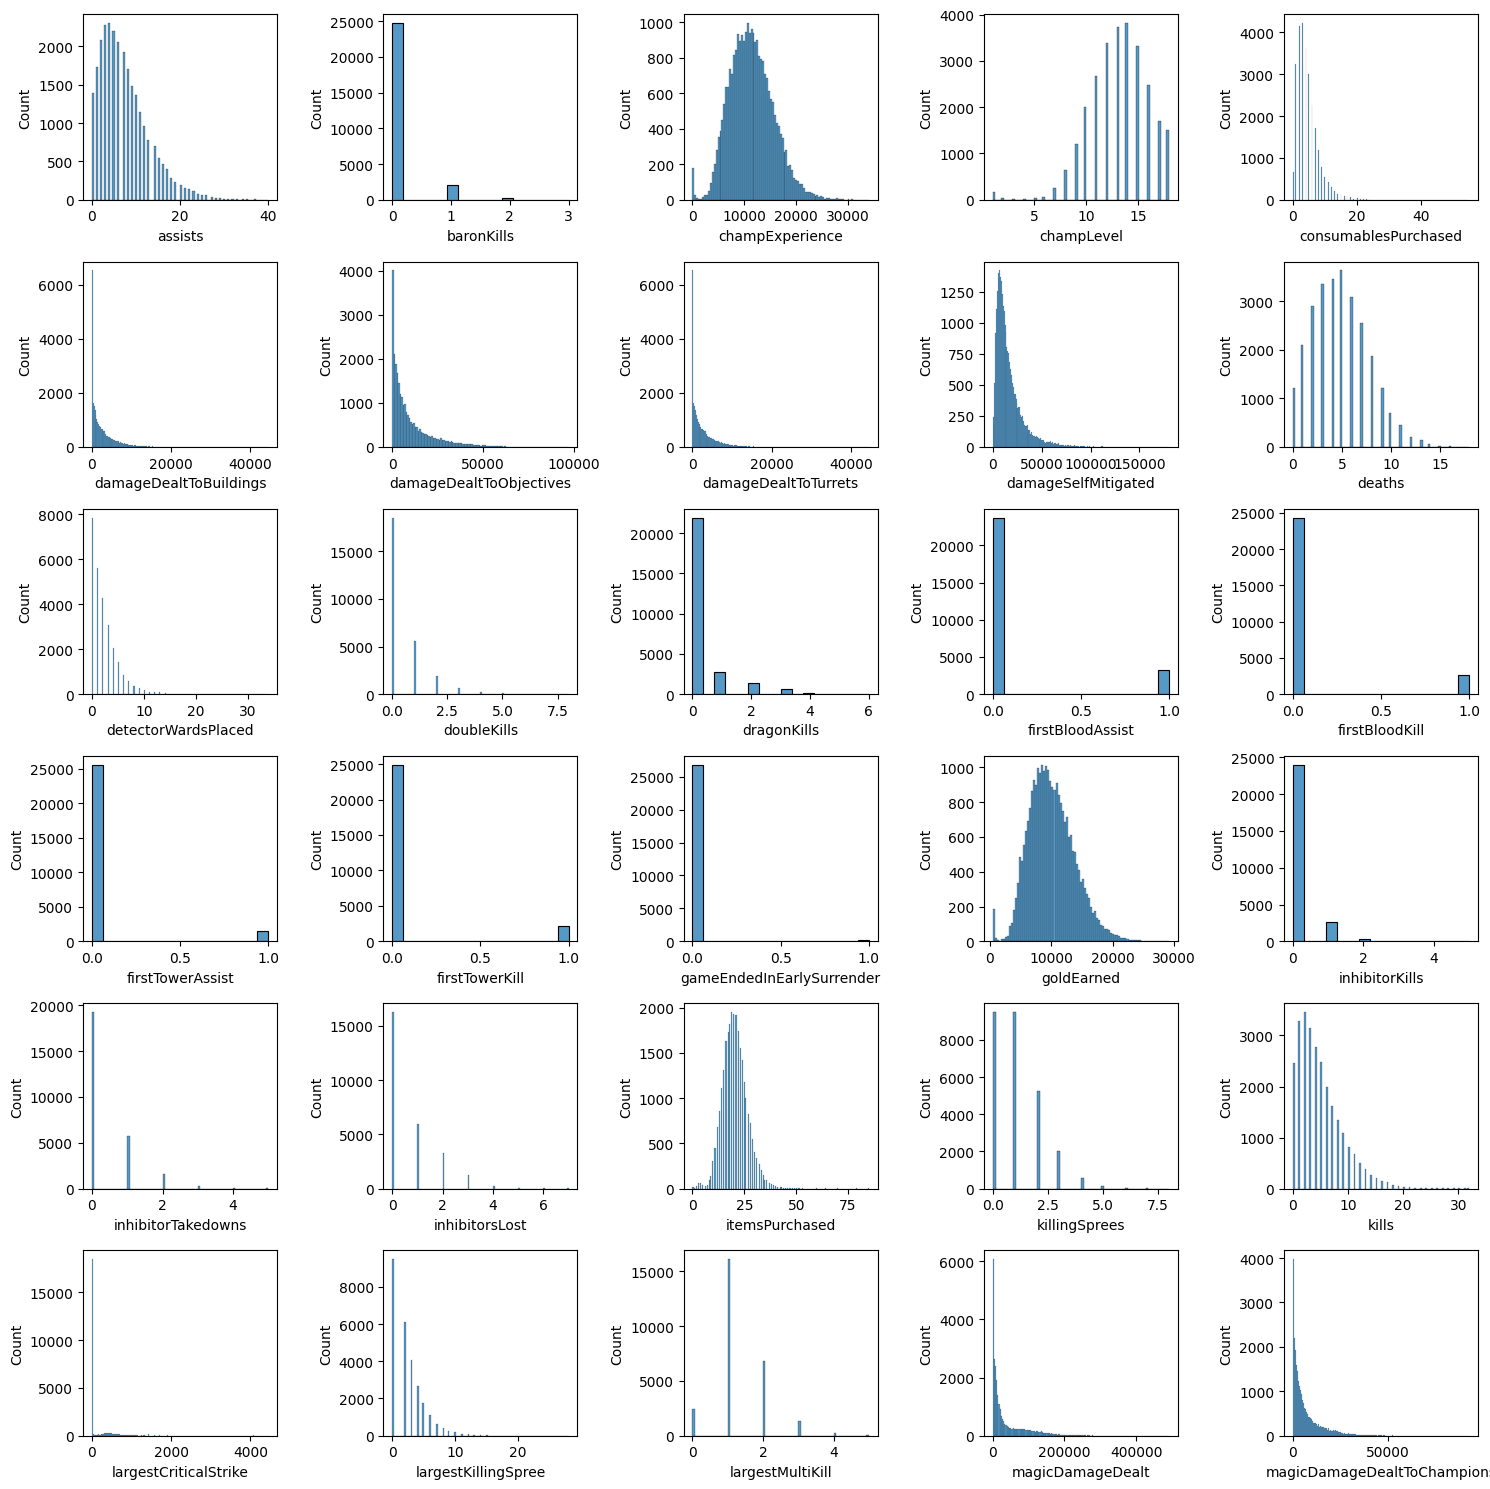

In [10]:
fig, axs = plt.subplots(nrows=6, ncols=5, figsize=(15, 15))
axs = axs.flatten()

# Iterate through all the numerical columns and create a plot for each one
for i, col in enumerate(numerical[:30]):
    sns.histplot(x=df[col], ax=axs[i])
plt.tight_layout()

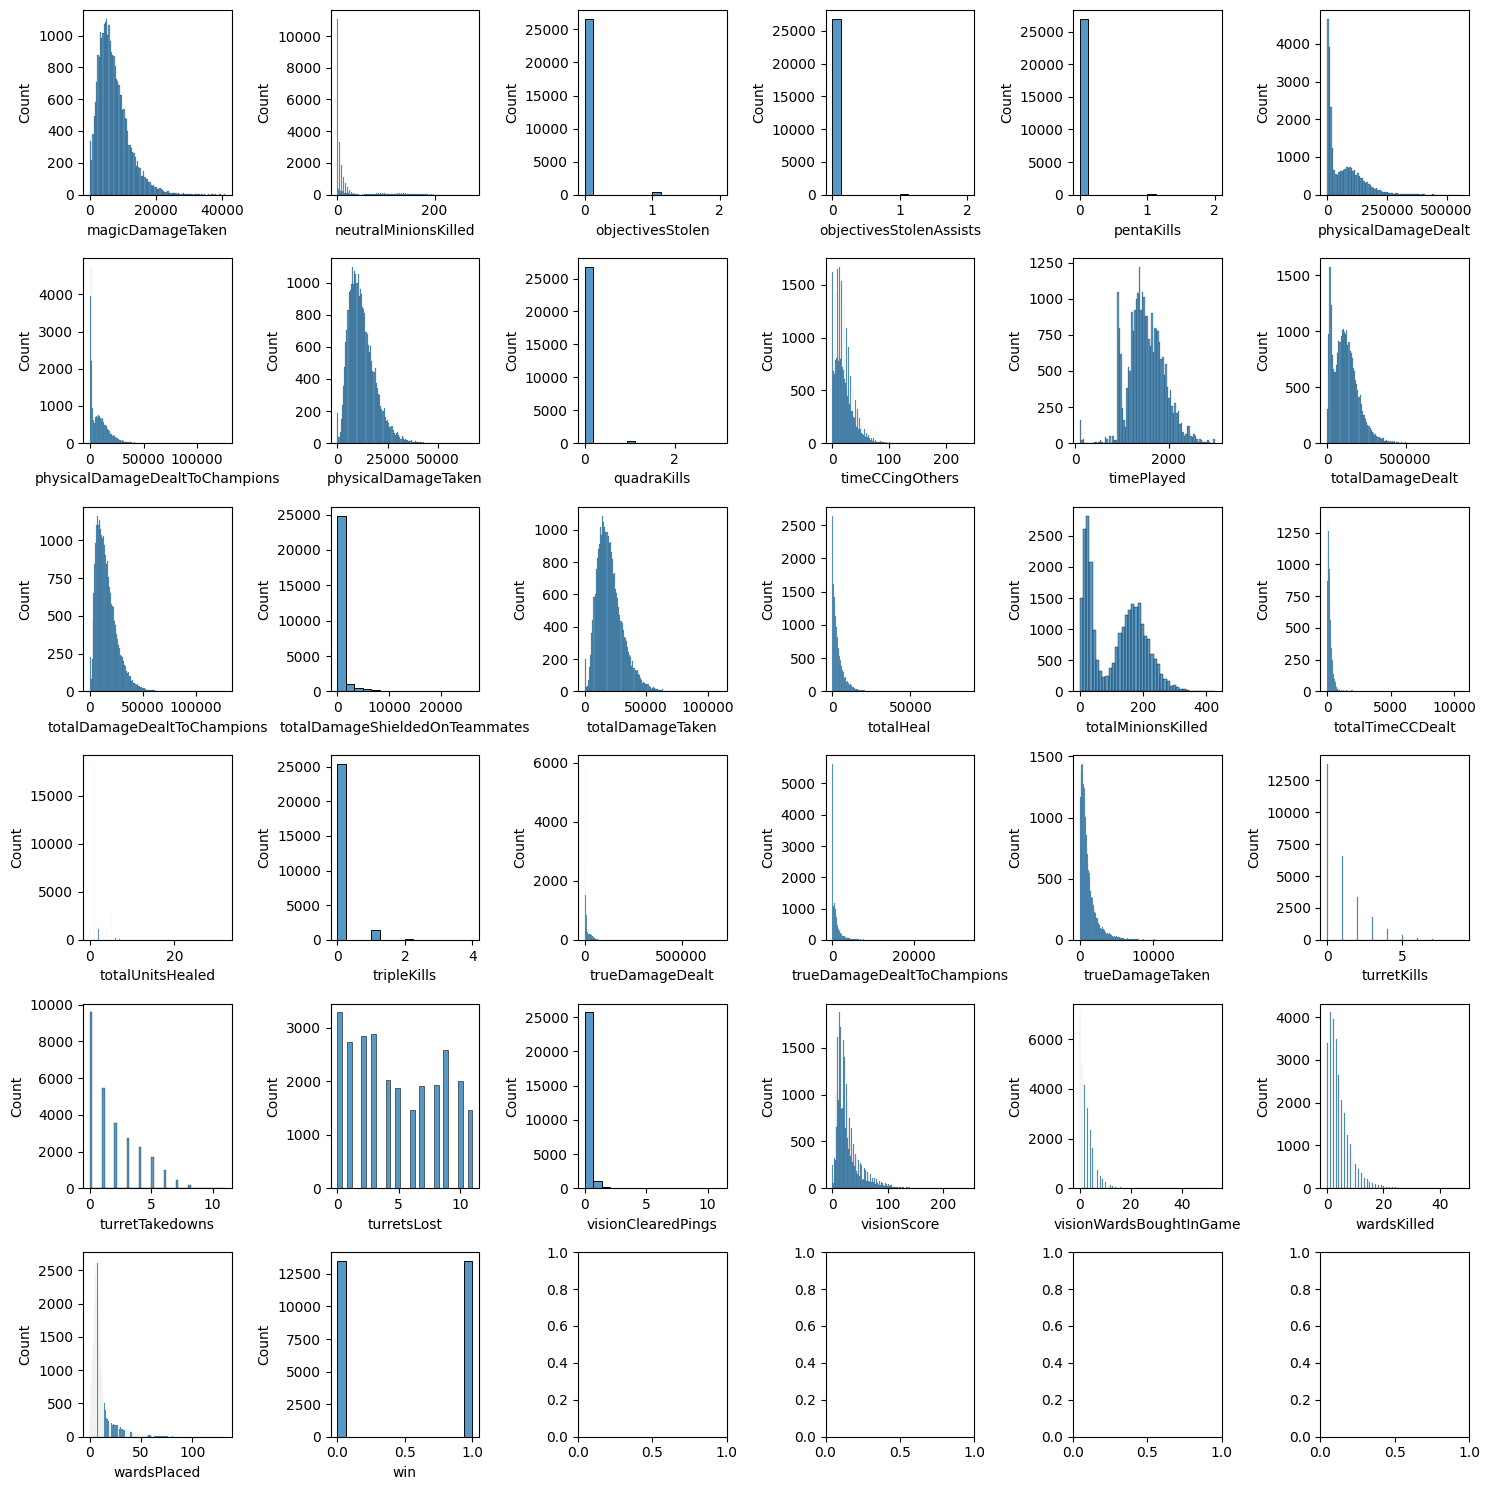

In [11]:
fig, axs = plt.subplots(nrows=6, ncols=6, figsize=(15, 15))
axs = axs.flatten()

for i, col in enumerate(numerical[30:]):
    sns.histplot(x=df[col], ax=axs[i])
plt.tight_layout()
plt.show()

In [12]:
cor=df.corrwith(df["win"]).sort_values(ascending=False)

<Axes: >

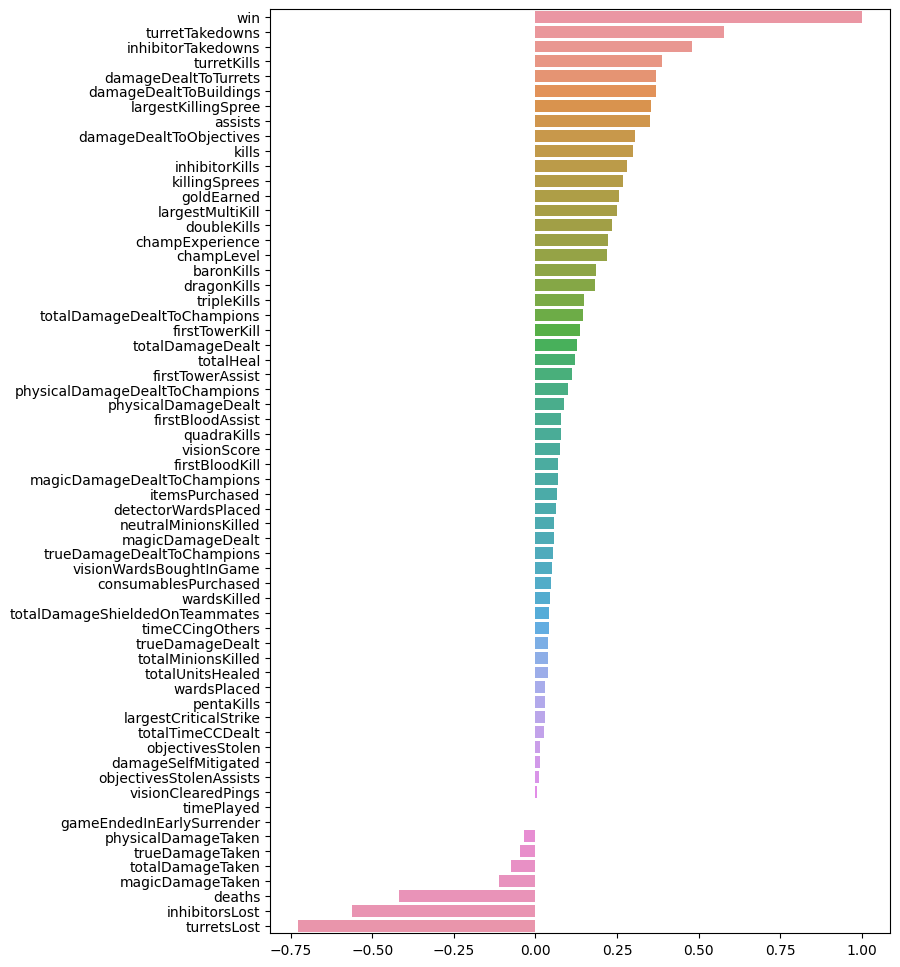

In [13]:
plt.figure(figsize=(8, 12))
sns.barplot(x=cor.values, y=cor.index)

In [14]:
cat_columns = df.select_dtypes(['object']).columns

In [15]:
cat_columns

Index(['championName', 'individualPosition'], dtype='object')

In [16]:
df = pd.get_dummies(df,columns=cat_columns)

In [17]:
df.shape

(27000, 230)

In [18]:
df["kda"]=(df["kills"]+df["assists"])/df["deaths"]

In [19]:
feature=["goldEarned","totalDamageDealt","totalMinionsKilled","totalHeal","champExperience","damageDealtToObjectives","wardsPlaced","neutralMinionsKilled"]

In [20]:
df["timePlayed"]=df["timePlayed"]/60

In [21]:
df['timePlayed'] = df['timePlayed'].round(1)

In [22]:
for i in feature:
  df[i]=df[i]/df['timePlayed']

In [23]:
X = df.drop(["win","turretsLost","turretTakedowns","inhibitorTakedowns","inhibitorsLost","inhibitorKills","turretKills","timePlayed"],axis=1)
y = df['win']

In [24]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.80)
#X_valid, X_test, y_valid, y_test = train_test_split(X_left,y_left,test_size=0.5)

In [25]:
import lightgbm as lgb

In [26]:
lgbm = lgb.LGBMClassifier()

In [28]:
lgbm.fit(X_train, y_train)

LGBMClassifier()

In [30]:
y_pred=lgbm.predict(X_test)

In [31]:
confusion_matrix = confusion_matrix(y_test, y_pred)

<Axes: >

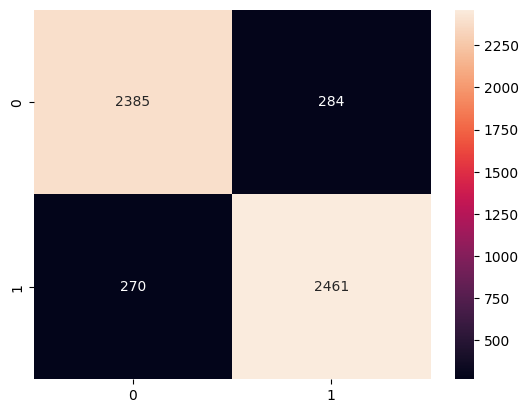

In [32]:
sns.heatmap(confusion_matrix, annot=True, fmt="d")

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      2669
           1       0.90      0.90      0.90      2731

    accuracy                           0.90      5400
   macro avg       0.90      0.90      0.90      5400
weighted avg       0.90      0.90      0.90      5400



In [34]:
metrics.accuracy_score(y_test, y_pred)

0.8974074074074074

In [35]:
from sklearn.model_selection import cross_val_score
cv_train = cross_val_score(lgbm, X_train, y_train, cv=5,scoring="accuracy")
print('Cross validation scores for train:', cv_train.round(2))
print('Average Cross validation scores for train:', np.average(cv_train).round(2))

Cross validation scores for train: [0.88 0.88 0.89 0.89 0.89]
Average Cross validation scores for train: 0.89


In [36]:
from sklearn.model_selection import cross_val_score
cv_test = cross_val_score(lgbm, X_test, y_test, cv=5,scoring="accuracy")
print('Cross validation scores for test:', cv_test.round(2))
print('Average Cross validation scores for test:', np.average(cv_test).round(2))

Cross validation scores for test: [0.88 0.88 0.88 0.87 0.88]
Average Cross validation scores for test: 0.88


In [37]:
from sklearn.model_selection import cross_val_score
cv_train = cross_val_score(lgbm, X_train, y_train, cv=5,scoring="roc_auc")
print('Cross validation scores for train:', cv_train.round(10))
print('Average Cross validation scores for train:', np.average(cv_train).round(5))

Cross validation scores for train: [0.95462969 0.95668101 0.96222943 0.96151451 0.95660675]
Average Cross validation scores for train: 0.95833


In [38]:
from sklearn.model_selection import cross_val_score
cv_test = cross_val_score(lgbm, X_test, y_test, cv=5,scoring="roc_auc")
print('Cross validation scores for test:', cv_test.round(5))
print('Average Cross validation scores for test:', np.average(cv_test).round(5))

Cross validation scores for test: [0.95244 0.95313 0.95464 0.95252 0.94842]
Average Cross validation scores for test: 0.95223


In [39]:
y_pred_proba = lgbm.predict_proba(X_test)[:, 1]

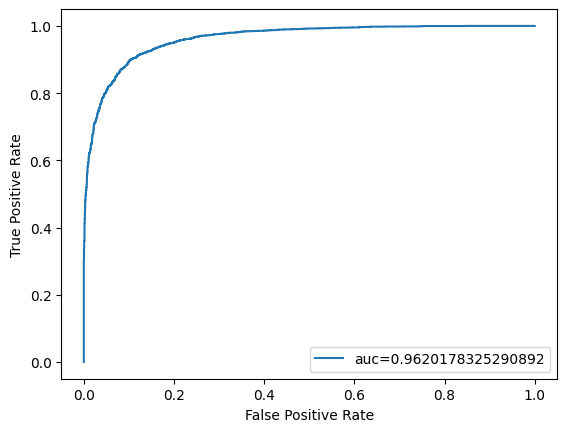

In [40]:
from sklearn.metrics import roc_auc_score
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
#create ROC curve
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [41]:
pip install shap --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 7.0 MB/s eta 0:00:00


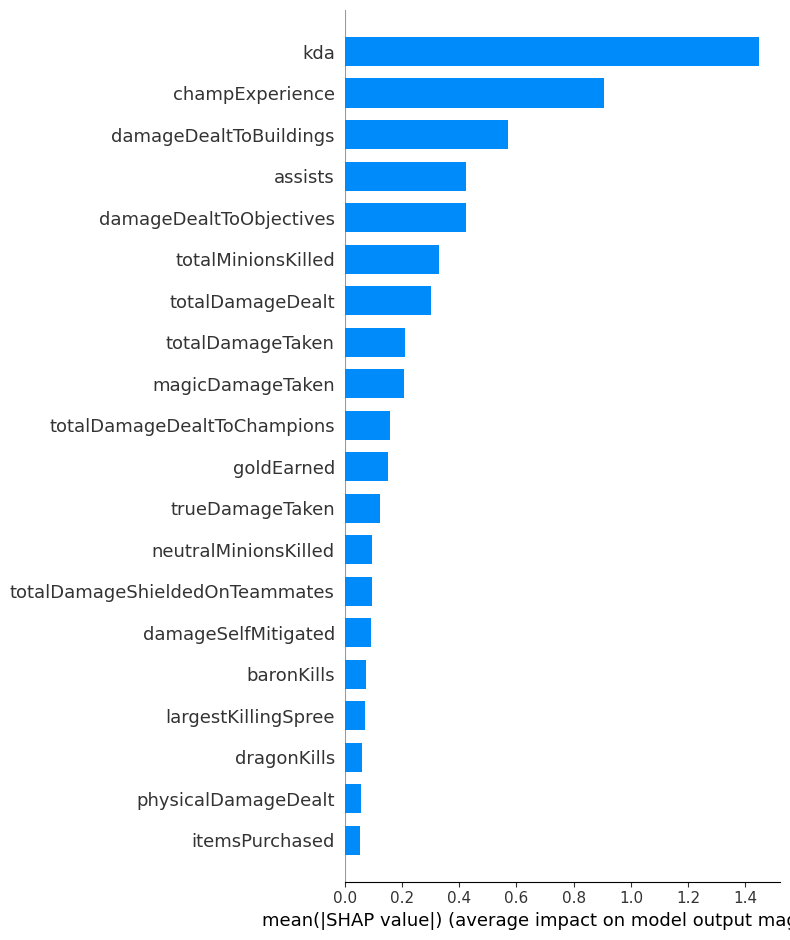

In [43]:
import shap
explainer= shap.Explainer(lgbm)
shap_values= explainer.shap_values(X_test)
shap.summary_plot(shap_values[1],plot_type="bar",feature_names=X_test.columns, max_display=20)